In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import extractData as eData

%matplotlib inline

In [247]:
data10 = eData.extractData(folder='/workspace/volume/transtension/data/output_0.25_1.00_kd1e-5/h5',ncpus=1)
data20 = eData.extractData(folder='/workspace/volume/transtension/data/output_0.25_1.00_kd1e-5/h5',ncpus=1)
data30 = eData.extractData(folder='/workspace/volume/transtension/data/output_0.25_1.00_kd1e-5/h5',ncpus=1)
data40 = eData.extractData(folder='/workspace/volume/transtension/data/output_0.25_1.00_kd1e-5/h5',ncpus=1)

data10.loadHDF5(timestep=10)
data20.loadHDF5(timestep=20)
data30.loadHDF5(timestep=30)
data40.loadHDF5(timestep=40)

In [248]:
frame10 = pd.DataFrame({'X_POSITION':data10.x.flatten(), 'Y_POSITION':data10.y.flatten(),
                   'Z_POSITION':data10.z.flatten(), 'DISCHARGE':data10.discharge.flatten(),
                   'CUMDIFF':data10.cumchange.flatten()})
frame20 = pd.DataFrame({'X_POSITION':data20.x.flatten(), 'Y_POSITION':data20.y.flatten(),
                   'Z_POSITION':data20.z.flatten(), 'DISCHARGE':data20.discharge.flatten(),
                   'CUMDIFF':data20.cumchange.flatten()})
frame30 = pd.DataFrame({'X_POSITION':data30.x.flatten(), 'Y_POSITION':data30.y.flatten(),
                   'Z_POSITION':data30.z.flatten(), 'DISCHARGE':data30.discharge.flatten(),
                   'CUMDIFF':data30.cumchange.flatten()})
frame40 = pd.DataFrame({'X_POSITION':data40.x.flatten(), 'Y_POSITION':data40.y.flatten(),
                   'Z_POSITION':data40.z.flatten(), 'DISCHARGE':data40.discharge.flatten(),
                   'CUMDIFF':data40.cumchange.flatten()})

In [249]:
xmin = data10.x.min()+250
xmax = data10.x.max()-250
ymin = data10.y.min()+250
ymax = data10.y.max()-250

In [250]:
f10 = frame10[(frame10['CUMDIFF'] > 10)]
f20 = frame20[(frame20['CUMDIFF'] > 10)]
f30 = frame30[(frame30['CUMDIFF'] > 10)]
f40 = frame40[(frame40['CUMDIFF'] > 10)]

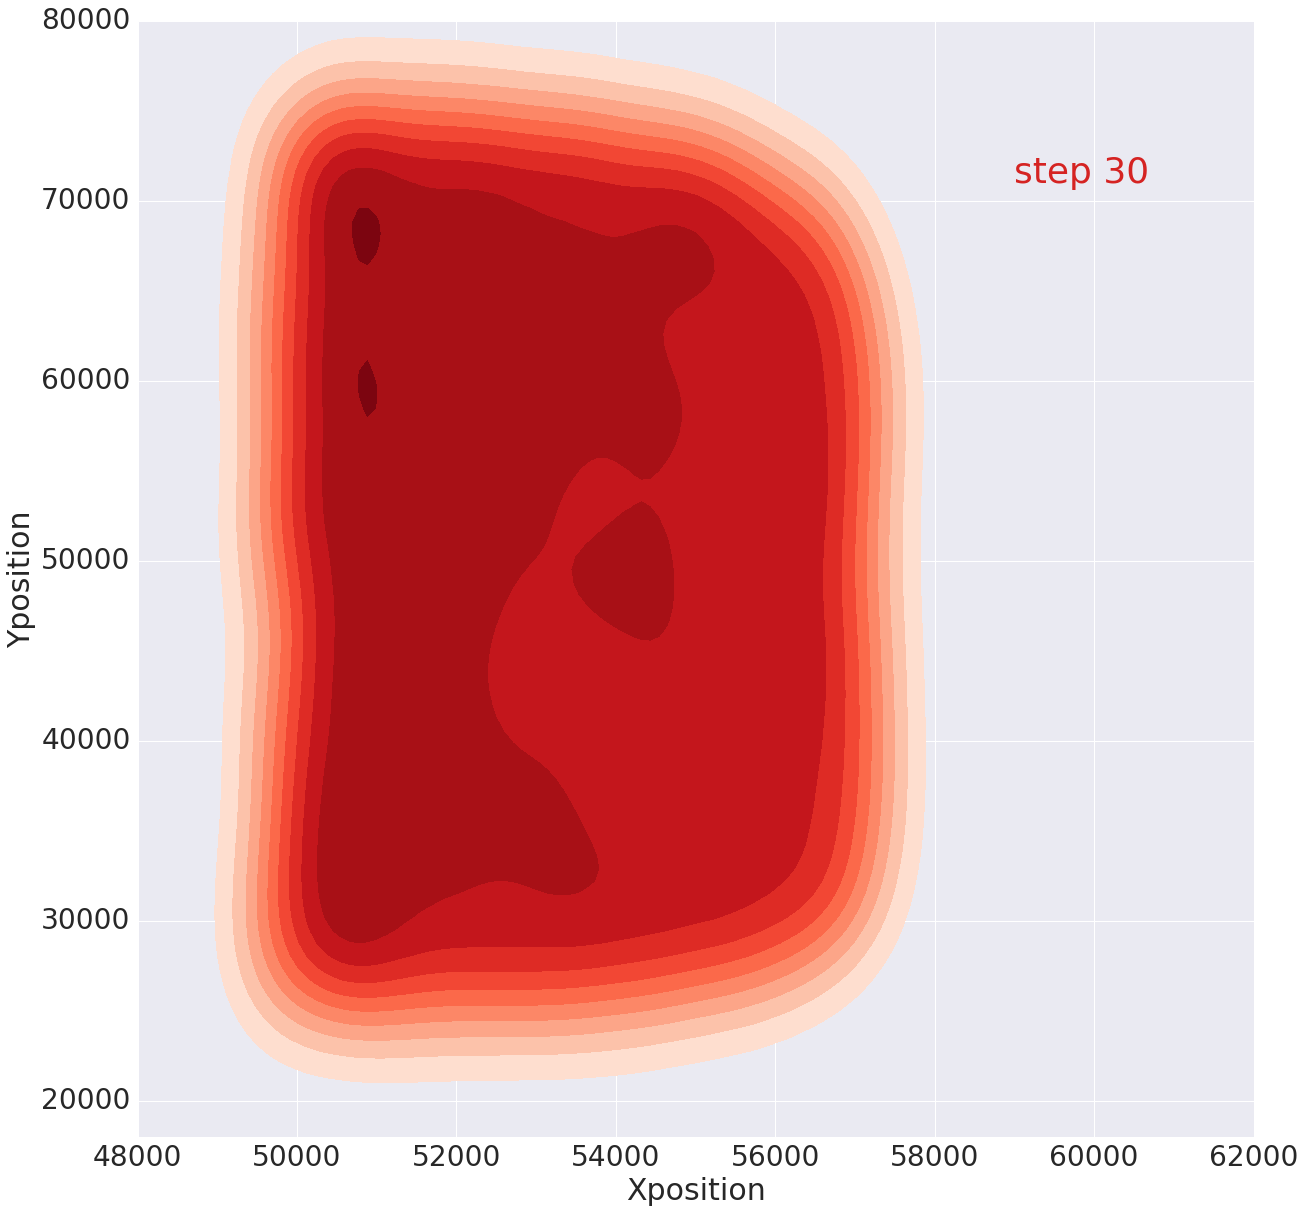

In [256]:
sns.set(style="darkgrid")

# Set up the figure
f, ax = plt.subplots(figsize=(20, 20))
#ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(f30["X_POSITION"],f30["Y_POSITION"],
                 cmap="Reds", shade=True, shade_lowest=False, xlim=(48000,62000), ylim=(18000,80000))

plt.xlim(48000,62000)
plt.ylim(18000,80000)
plt.rc("legend", fontsize=25)
plt.xlabel("Xposition", fontsize=30)
plt.ylabel("Yposition", fontsize=30)
#plt.title('Basin Location for selected dataset', fontsize=20, fontweight='bold')
plt.tick_params(axis="both", labelsize=28)
# Add labels to the plot
red = sns.color_palette("Reds")[-2]
ax.text(59000, 71000, "step 30", size=36, color=red)

(0, 0.0003)

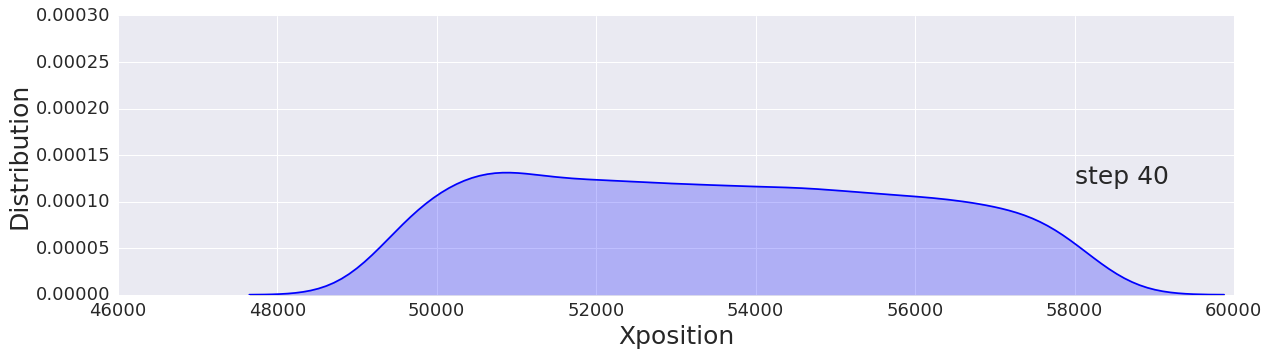

In [273]:
f, ax = plt.subplots(figsize=(20, 5))

# Plot a historgram and kernel density estimate
sns.distplot(f40.X_POSITION, hist=False, color="b", kde_kws={"shade": True})

plt.rc("legend", fontsize=25)
plt.ylabel("Distribution", fontsize=25)
plt.xlabel("Xposition", fontsize=25)

#plt.title('Basin Location for selected dataset', fontsize=20, fontweight='bold')
plt.tick_params(axis="both", labelsize=18)
ax.text(58000, 0.000120, "step 40", size=25)


#plt.xlim(10000,90000)
plt.xlim(46000,60000)
plt.ylim(0,0.0003)

In [122]:
result = eData.extractData(folder='/workspace/volume/transtension/data/output_1.00_0.25_kd1e-5/h5',ncpus=1)
result.loadHDF5(timestep=10)

In [123]:
#result.cumchange.shape[0] 
len(result.cumchange)

64891

In [124]:
df = pd.DataFrame({'X_POSITION':result.x.flatten(), 'Y_POSITION':result.y.flatten(),
                   'Z_POSITION':result.z.flatten(), 'DISCHARGE':result.discharge.flatten(),
                   'CUMDIFF':result.cumchange.flatten()})

In [125]:
xmin = result.x.min()+250
xmax = result.x.max()-250
ymin = result.y.min()+250
ymax = result.y.max()-250

In [126]:
result.cumchange.max()

123.98407

In [143]:
sub = df[(df['CUMDIFF'] > 10)]
sub2 = df[(df['CUMDIFF'] < -10)]

In [144]:
suba = sub.copy()
print suba["X_POSITION"].min(), suba["X_POSITION"].max()
print suba["Y_POSITION"].min(), suba["Y_POSITION"].max()

49972.8 56323.4
23537.9 69131.9


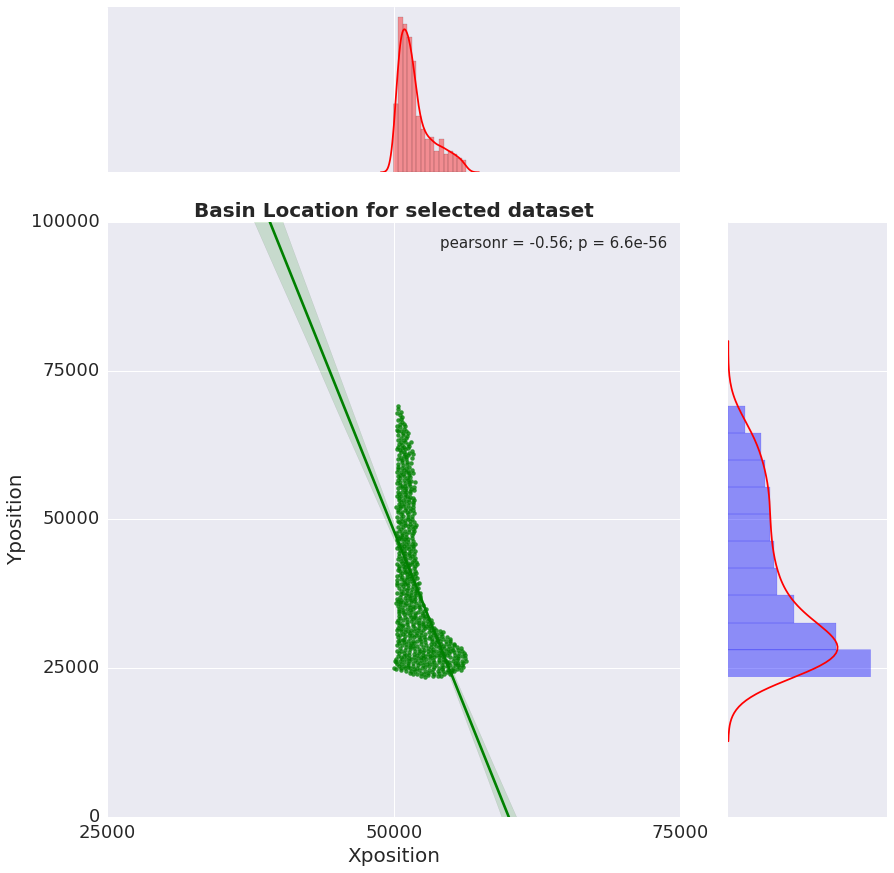

In [145]:
g1 = sns.jointplot(x="X_POSITION", y="Y_POSITION", data=suba, 
                   kind='reg', color='g', dropna=True, size=12, space=0.3, ratio=3, 
                   xlim=(25000,75000), ylim=(ymin,ymax), fit_reg=True, marginal_kws={'color':'#ff0000'})

plt.setp(g1.ax_marg_y.patches, color='#0000ff')

plt.rc("legend", fontsize=15)
plt.xlabel("Xposition", fontsize=20)
plt.ylabel("Yposition", fontsize=20)
plt.title('Basin Location for selected dataset', fontsize=20, fontweight='bold')
plt.tick_params(axis="both", labelsize=18)

g1.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(25000))
g1.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(25000))

sns.plt.show()

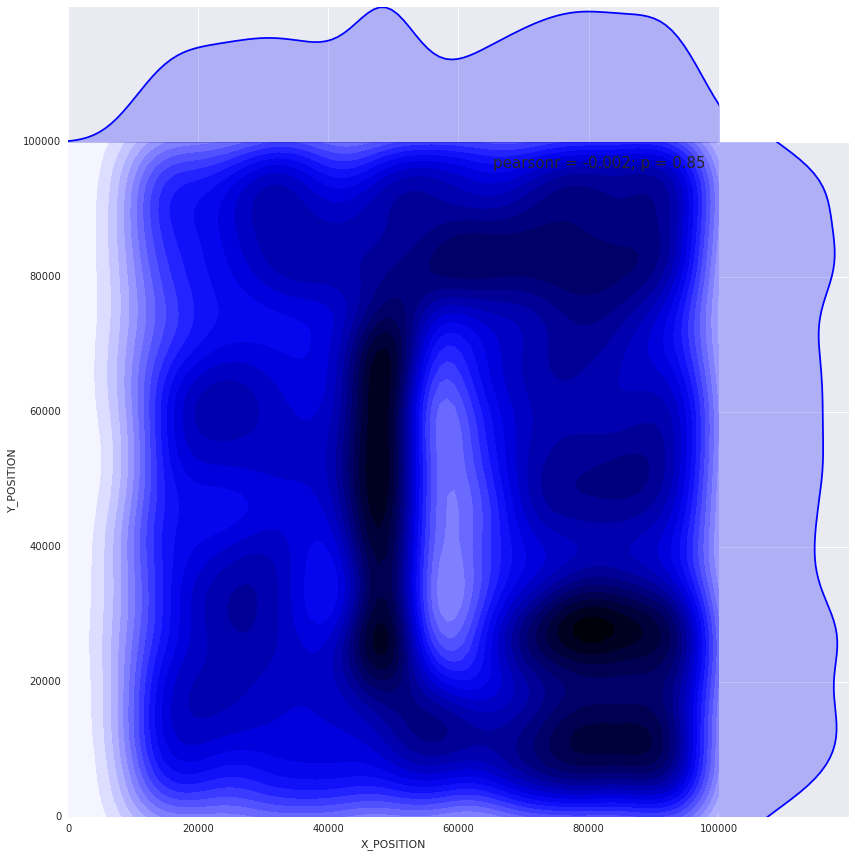

In [146]:
g = sns.jointplot(x="X_POSITION", y="Y_POSITION", data=sub2,
                   kind="kde", space=0, n_levels=25, size=12, xlim=(xmin,xmax), ylim=(ymin,ymax), color="b")

#g.x = sub2.X_POSITION
#g.y = sub2.Y_POSITION
#g.plot_joint(plt.scatter, marker='o', c='r', s=10)
sns.plt.show()

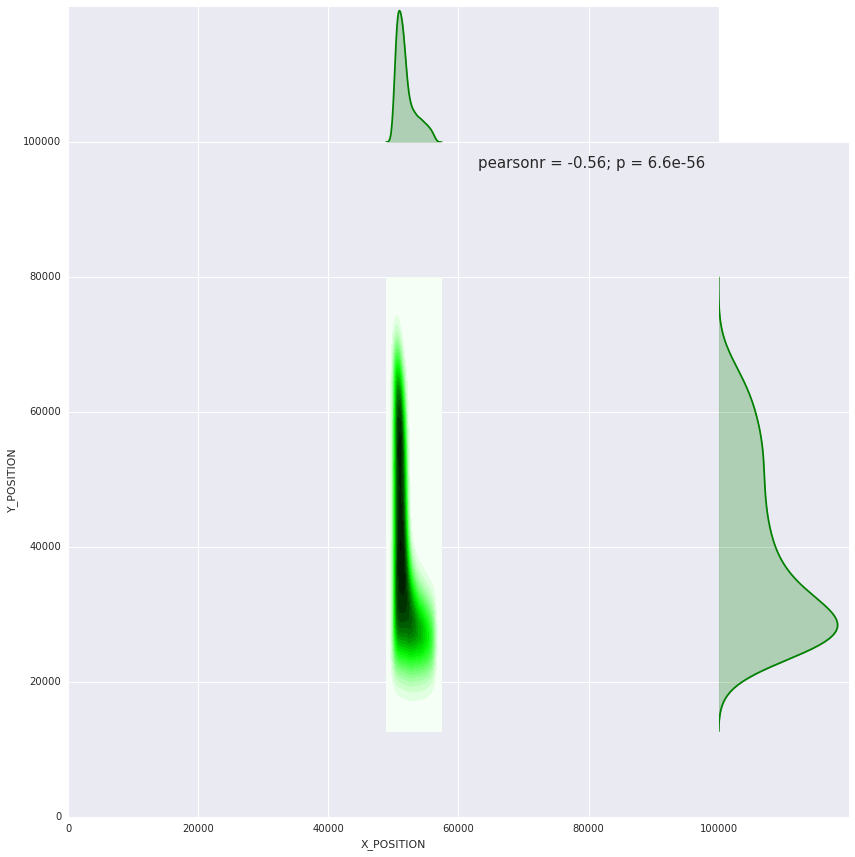

In [147]:
g = sns.jointplot(x="X_POSITION", y="Y_POSITION", data=sub,
                   kind="kde", space=0, n_levels=25, size=12, xlim=(xmin,xmax), ylim=(ymin,ymax), color="g")

#g.x = sub2.X_POSITION
#g.y = sub2.Y_POSITION
#g.plot_joint(plt.scatter, marker='o', c='r', s=10)
sns.plt.show()

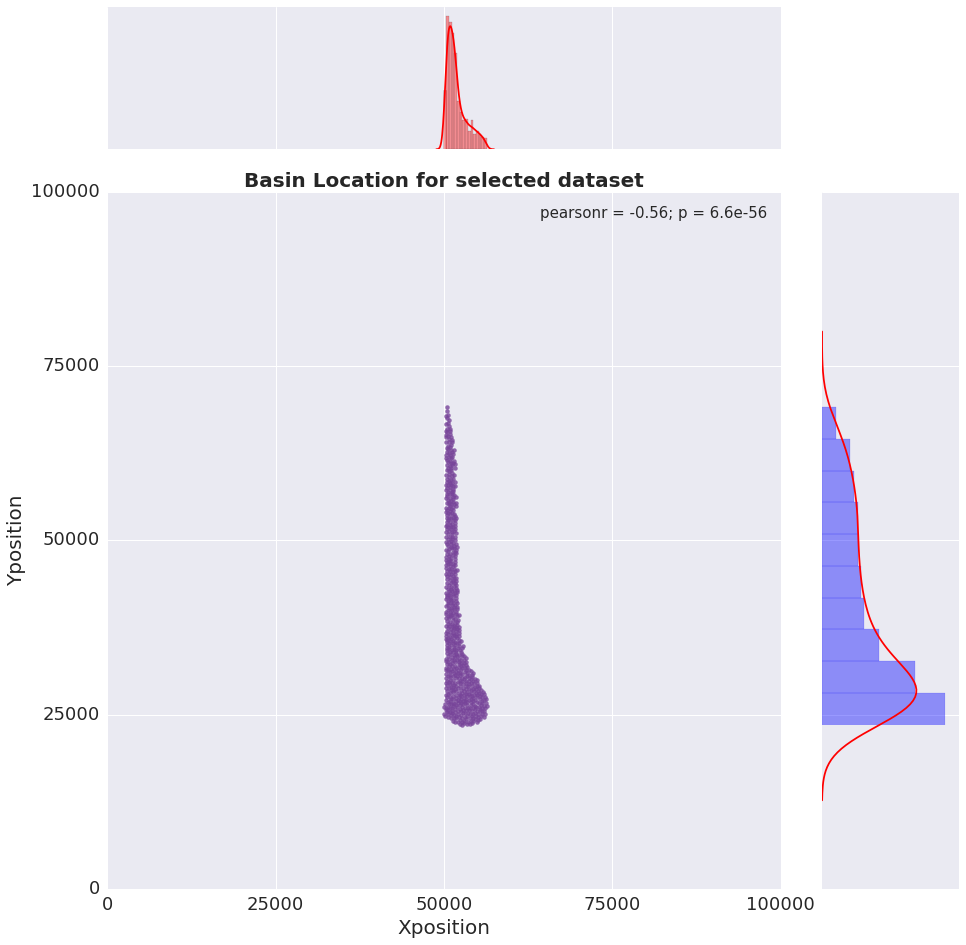

In [148]:
g1 = sns.jointplot(x="X_POSITION", y="Y_POSITION", data=suba, 
                   kind='reg', color='#774499', dropna=True, size=13, space=0.3, ratio=4, 
                   xlim=(xmin,xmax), ylim=(ymin,ymax), fit_reg=False, marginal_kws={'color':'#ff0000'})

plt.setp(g1.ax_marg_y.patches, color='#0000ff')

plt.rc("legend", fontsize=15)
plt.xlabel("Xposition", fontsize=20)
plt.ylabel("Yposition", fontsize=20)
plt.title('Basin Location for selected dataset', fontsize=20, fontweight='bold')
plt.tick_params(axis="both", labelsize=18)

g1.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(25000))
g1.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(25000))

sns.plt.show()